# Fashion-mnist dataset work

[link to my github's reposetory](https://github.com/Matan-Hodadov/nba-players-kaggle-project)

In [66]:
#import what we need to start working on the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Take a first look and try to understand the data

In [67]:
#show the data
df_train = pd.read_csv('fashion_mnist_data/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [68]:
df_train['label']

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

we can see that the first column is the label of the image nad the rest of the columns are presenting each pixal in the image
now lets get some info on how data

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [70]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


### Lets fine which label represent which cloth.

### We can run each label as see like that:

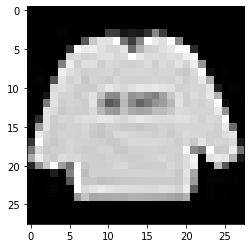

In [71]:
first_image = df_train.iloc[0][1:]

first_image = np.array(first_image, dtype='uint8')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

### But we can be efficients and just google it :)

### After a quick google search we know that:

<pre>
label     describsion  
0         t-shirt/top
1         trouser - pants
2         pullover - sweader
3         dress
4         coat
5         sandals
6         shirt
7         sneaker
8         bag
9         ankle boots
</pre>

# Lets add the testing set

In [72]:
df_test = pd.read_csv('fashion_mnist_data/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df_test.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [73]:
y_train = df_train['label']

X_train = df_train.drop('label', 1)

In [74]:
y_test = df_test['label']

X_test = df_test.drop('label', 1)

lets use pca to decrease the number of dimensions from 28*28=784

lets plot a graph to see the ratio between the number of dimensions and variance 

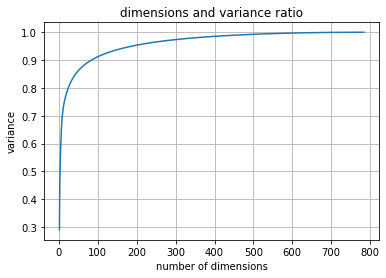

In [131]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x = np.arange(1, len(cumsum)+1)
plt.plot(x, cumsum)
plt.xlabel('number of dimensions')
plt.ylabel('variance')
plt.title('dimensions and variance ratio')
plt.grid(True)
plt.show()

lets take the number of dimensions that will give us a variance of 0.88 of the data

In [76]:
pca = PCA(n_components=0.88)
X_train_reduced = pca.fit_transform(X_train)
d = len(pca.singular_values_)

now lets match the x_test dimensions to the x_train dimensions

In [77]:
pca = PCA(n_components=d)
X_test_reduced = pca.fit_transform(X_test)

before we go to the models lets import some librarys to evaluate out models

In [78]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [81]:
# precision - tp / (tp + fp)
# recall - tp / (tp + fn)
# F1 score - (precision*recall) / (precision+recall)

# models

# RANDOM FOREST

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=None, random_state=0)
rf_cross_val = cross_validate(rf_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
rf_scores = rf_cross_val["test_score"]
rf_time = rf_cross_val["fit_time"] + rf_cross_val["score_time"]

In [83]:
print(rf_scores)
print(rf_scores.mean())
print(rf_scores.std())
print("amount of time in totoal: ", rf_time.sum(), "seconds")

[0.86516667 0.86633333 0.87166667 0.86325    0.862     ]
0.8656833333333334
0.0033459760243545805
amount of time in totoal:  546.1365451812744 seconds


In [95]:
rf_predictions = cross_val_predict(rf_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, rf_predictions))
print(classification_report(y_train, rf_predictions))
print(metrics.accuracy_score(y_train, rf_predictions))

[[5145    5   87  216   29   11  433    0   73    1]
 [  18 5745   35  159   11    0   28    0    3    1]
 [  48    0 4833   58  615    8  383    0   55    0]
 [ 185   21   35 5391  185    1  153    0   27    2]
 [  12    5  502  224 4857    5  345    0   50    0]
 [   0    0    0    3    0 5596    1  225   23  152]
 [ 976    6  712  150  543    7 3499    0  107    0]
 [   0    0    0    0    0  223    0 5480    5  292]
 [  10    0   32   41   26   66   61   19 5733   12]
 [   0    0    0    1    0  119    0  214    4 5662]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6000
           1       0.99      0.96      0.98      6000
           2       0.78      0.81      0.79      6000
           3       0.86      0.90      0.88      6000
           4       0.78      0.81      0.79      6000
           5       0.93      0.93      0.93      6000
           6       0.71      0.58      0.64      6000
           7       0.92      0.91   

# KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier

#now lets find the optimum K 
mean_score_rate = []
for i in range(1,30):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_scores = cross_val_score(knn_clf, X_train_reduced, y_train, cv = 5)
    if knn_scores.std() > 0.01 :
        mean_score_rate.append(0)
    else:
        mean_score_rate.append(knn_scores.mean())
index = mean_score_rate.index(max(err_rate)) + 1
index

KeyboardInterrupt: 

In [85]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_cross_val = cross_validate(knn_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
knn_scores = knn_cross_val["test_score"]
knn_time = knn_cross_val["fit_time"] + knn_cross_val["score_time"]

In [86]:
print(knn_scores)
print(knn_scores.mean())
print(knn_scores.std())
print("amount of time in totoal: ", knn_time.sum(), "seconds")

[0.86233333 0.86016667 0.86233333 0.856      0.86066667]
0.8603
0.002319961685507366
amount of time in totoal:  15.046533584594727 seconds


In [ ]:
knn_predictions = cross_val_predict(knn_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, knn_predictions))
print(classification_report(y_train, knn_predictions))
print(metrics.accuracy_score(y_train, knn_predictions))

# ADABOOST

### we can use the random forest from the first modal

In [87]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(rf_clf, n_estimators=200, learning_rate=0.5)
ada_cross_val = cross_validate(ada_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
ada_scores = ada_cross_val["test_score"]
ada_time = ada_cross_val["fit_time"] + ada_cross_val["score_time"]

In [88]:
print(ada_scores)
print(ada_scores.mean())
print(ada_scores.std())
print("amount of time in totoal: ", ada_time.sum(), "seconds")

[0.8655     0.86741667 0.86991667 0.8645     0.86208333]
0.8658833333333333
0.002650262041551526
amount of time in totoal:  654.7597095966339 seconds


In [ ]:
ada_predictions = cross_val_predict(ada_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, ada_predictions))
print(classification_report(y_train, ada_predictions))
print(metrics.accuracy_score(y_train, ada_predictions))

# GRADIENT BOOST 
### (using decision tree)

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt_clf = GradientBoostingRegressor()
gbrt_cross_val = cross_validate(gbrt_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
gbrt_scores = gbrt_cross_val["test_score"]
gbrt_time = gbrt_cross_val["fit_time"] + gbrt_cross_val["score_time"]

KeyboardInterrupt: 

In [90]:
print(gbrt_scores)
print(gbrt_scores.mean())
print(gbrt_scores.std())
print("amount of time in totoal: ", gbrt_time.sum(), "seconds")

[0.78327045 0.79044547 0.78302885 0.77646954 0.77442254]
0.7815273699567072
0.005672488184247755
amount of time in totoal:  1313.9203372001648 seconds


In [ ]:
gbrg_predictions = cross_val_predict(grbg_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, gbrg_predictions))
print(classification_report(y_train, gbrg_predictions))
print(metrics.accuracy_score(y_train, gbrg_predictions))

# GAUSSIAN NAIVE BAYES

In [116]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_cross_val = cross_validate(gnb_clf, X_train_reduced, y_train, cv = 5, n_jobs = -1)
gnb_scores = gnb_cross_val["test_score"]
gnb_time = gnb_cross_val["fit_time"] + gnb_cross_val["score_time"]

In [117]:
print("scores are: " , gnb_scores)
print("mean score: " , gnb_scores.mean())
print("std score: " , gnb_scores.std())
print("amount of time in totoal: ", gnb_time.sum(), "seconds")

scores are:  [0.78008333 0.7755     0.77641667 0.77466667 0.77841667]
mean score:  0.7770166666666667
std score:  0.001977231510077798
amount of time in totoal:  4.0021116733551025 seconds


In [118]:
gnb_predictions = cross_val_predict(gnb_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, gnb_predictions))
print(classification_report(y_train, gnb_predictions))
print(metrics.accuracy_score(y_train, gnb_predictions))

[[4663    1  119  417   24   31  425    0  320    0]
 [  33 5447  112  264   19    8   66    0   51    0]
 [ 102    0 3844   43  799   32  959    0  220    1]
 [ 405   30   62 4889  181   17  320    0   96    0]
 [  35    3  671  293 3987    4  885    1  121    0]
 [  10    0    1    4    0 4756   79  800  217  133]
 [1067    1  746  228  491   22 3081    0  364    0]
 [   2    0    0    0    0  286   15 5284   15  398]
 [  55    0   49   50   46  152  234  127 5280    7]
 [   2    0    0    0    0  132   18  391   67 5390]]
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6000
           1       0.99      0.91      0.95      6000
           2       0.69      0.64      0.66      6000
           3       0.79      0.81      0.80      6000
           4       0.72      0.66      0.69      6000
           5       0.87      0.79      0.83      6000
           6       0.51      0.51      0.51      6000
           7       0.80      0.88   

creat a df to put all the data we collected to one place 

In [113]:
dt = {}
dt.update({"model name" : ["random forest", "knn", "adaboost", "gradient boosting", "nasive bayes"]})
dt.update({"model mean score" : [rf_scores.mean(), knn_scores.mean(), ada_scores.mean(), gbrt_scores.mean(), gnb_scores.mean()]})
dt.update({"model total time" : [rf_time.sum(), knn_time.sum(), ada_time.sum(), gbrt_time.sum(), gnb_time.sum()]})
dt.update({"model object" : [rf_clf, knn_clf, ada_clf, gbrt_clf, gnb_clf]})
df = pd.DataFrame(data = dt)
df = df.sort_values(by=['model mean score'], ascending=False)
df =  df.set_index(np.arange(1,len(df)+1))
# df.iloc[:, :len(df.columns)-1]
df  #-if you want to show all the df

,model name,model mean score,model total time,model object
1,adaboost,0.865883,654.759710,AdaBoostClassifier(base_estimator=RandomForest...
2,random forest,0.865683,546.136545,RandomForestClassifier(random_state=0)
3,knn,0.860300,15.046534,KNeighborsClassifier(n_neighbors=8)
4,gradient boosting,0.781527,1313.920337,GradientBoostingRegressor()
5,nasive bayes,0.777017,1.983786,GaussianNB()


adaboost and random forst scores are to similuar. lets check adaboost with learning rate = 1 

In [115]:
ada_clf2 = AdaBoostClassifier(rf_clf, n_estimators=200, learning_rate=1)
ada_cross_val2 = cross_validate(ada_clf2, X_train_reduced, y_train, cv = 5, n_jobs = -1)
ada_scores2 = ada_cross_val2["test_score"]
ada_time2 = ada_cross_val2["fit_time"]

print(ada_scores2)
print(ada_scores2.mean())
print(ada_scores2.std())
print("amount of time in totoal: ", ada_time2.sum(), "seconds")

[0.86716667 0.86891667 0.8695     0.86283333 0.86391667]
0.8664666666666665
0.002660722541800346
amount of time in totoal:  587.9230222702026 seconds


In [ ]:
gnb_predictions = cross_val_predict(gnb_clf, X_train_reduced, y_train, cv=5, n_jobs=-1)

print(confusion_matrix(y_train, gnb_predictions))
print(classification_report(y_train, gnb_predictions))
print(metrics.accuracy_score(y_train, gnb_predictions))

we got better results so we will stay with learing rate=1 

### The best model from out trainnig set is adaboost with random forest

now lets check our model on out test 

In [ ]:
ada_clf = AdaBoostClassifier(rf_clf, n_estimators=50, learning_rate=1)
ada_clf.fit(X_train_reduced, y_train)
predictions = ada_clf.predict(X_test_reduced)

In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))
print(metrics.accuracy_score(y_test, predictions))